In [ ]:
pip install resampy;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/allabels.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/allabels.zip
   creating: allabels/allabels/
  inflating: allabels/allabels/0.wav  
  inflating: allabels/allabels/1.wav  
  inflating: allabels/allabels/10.wav  
  inflating: allabels/allabels/100.wav  
  inflating: allabels/allabels/1000.wav  
  inflating: allabels/allabels/1001.wav  
  inflating: allabels/allabels/1002.wav  
  inflating: allabels/allabels/1003.wav  
  inflating: allabels/allabels/1004.wav  
  inflating: allabels/allabels/1005.wav  
  inflating: allabels/allabels/1006.wav  
  inflating: allabels/allabels/1007.wav  
  inflating: allabels/allabels/1008.wav  
  inflating: allabels/allabels/1009.wav  
  inflating: allabels/allabels/101.wav  
  inflating: allabels/allabels/1010.wav  
  inflating: allabels/allabels/1011.wav  
  inflating: allabels/allabels/1012.wav  
  inflating: allabels/allabels/1013.wav  
  inflating: allabels/allabels/1014.wav  
  inflating: allabels/allabels/1015.wav  
  inflating: allabels/allabels/101

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob
import IPython.display as ipd
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
import random
%pylab inline
from sklearn.preprocessing import minmax_scale

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**Reading Training** **Datasheet**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')
train.head()

,id,Class
0,847,honking
1,848,ship
2,849,ship
3,850,honking
4,851,honking


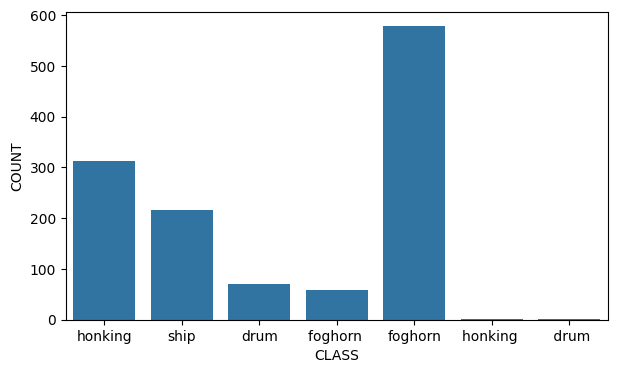

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
#sns.countplot(df['Class'])

sns.countplot(x='Class', data=train)
plt.xlabel('CLASS')
plt.ylabel('COUNT')

# Display the plot
plt.show()

In [ ]:
train["Class"].value_counts()

Class
foghorn     578
honking     313
ship        217
drum         71
foghorn      58
honking       1
 drum         1
Name: count, dtype: int64

In [ ]:
def scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    data = pd.DataFrame(data)
    return data
def Principal_Component(data):
    pca = PCA(0.95)
    X_pca = pca.fit_transform(data)
    X_pca = pd.DataFrame(X_pca)
    return X_pca

for mffcs

In [ ]:
import os

def parser(row):
  # path of the file
  file_name = os.path.join('allabels/allabels', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)

  feature_mffc = mfccs
  label = row.Class

  return feature_mffc

In [ ]:
data =pd.DataFrame( train.apply(parser, axis=1).tolist())
# data.columns = ['feature_mffc','label']
data

FileNotFoundError: [Errno 2] No such file or directory: 'allabels/allabels/578.wav'

In [ ]:
data =scaling(data)


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.413753,1.354778,1.381753,0.709951,-1.325468,-1.053999,1.233730,1.384124,1.249430,-1.342761,...,-1.382442,-1.391927,-1.198072,-0.064709,0.638800,0.946674,1.275035,1.344091,1.368885,1.241458
1,1.413753,1.354778,1.381753,0.709951,-1.325468,-1.053999,1.233730,1.384124,1.249430,-1.342761,...,-1.382442,-1.391927,-1.198072,-0.064709,0.638800,0.946674,1.275035,1.344091,1.368885,1.241458
2,1.413753,1.354778,1.381753,0.709951,-1.325468,-1.053999,1.233730,1.384124,1.249430,-1.342761,...,-1.382442,-1.391927,-1.198072,-0.064709,0.638800,0.946674,1.275035,1.344091,1.368885,1.241458
3,-0.720271,-0.928369,-0.855425,0.469410,0.911287,-0.219457,-1.023854,-0.832056,-0.233008,0.898083,...,0.515665,0.582572,0.216095,-0.815082,-1.090356,-1.097218,-0.990140,-0.935532,-0.903786,-1.034380
4,-0.720271,-0.928369,-0.855425,0.469410,0.911287,-0.219457,-1.023854,-0.832056,-0.233008,0.898083,...,0.515665,0.582572,0.216095,-0.815082,-1.090356,-1.097218,-0.990140,-0.935532,-0.903786,-1.034380
5,-0.720271,-0.928369,-0.855425,0.469410,0.911287,-0.219457,-1.023854,-0.832056,-0.233008,0.898083,...,0.515665,0.582572,0.216095,-0.815082,-1.090356,-1.097218,-0.990140,-0.935532,-0.903786,-1.034380
6,-0.749937,-0.918110,-0.931259,0.150848,1.108651,0.611282,-1.088039,-0.969448,-0.177950,1.065483,...,0.488242,0.440313,-0.070303,-0.885099,-1.097094,-1.174038,-1.075771,-0.958610,-0.896390,-1.038894
7,-0.665255,-0.180558,-0.323862,-1.844467,0.066945,1.604542,0.229206,-0.343378,-1.435658,0.134275,...,1.056043,0.993875,1.508118,1.762237,1.225880,0.812834,0.110542,-0.133534,-0.249454,0.208829
8,-0.665255,-0.180558,-0.323862,-1.844467,0.066945,1.604542,0.229206,-0.343378,-1.435658,0.134275,...,1.056043,0.993875,1.508118,1.762237,1.225880,0.812834,0.110542,-0.133534,-0.249454,0.208829


In [ ]:
data_mffc=Principal_Component(data)

In [ ]:
data_mffc


,0,1
0,8.016833,-0.147343
1,8.016836,-0.147344
2,8.016836,-0.147343
3,-4.110587,-2.313680
4,-4.110587,-2.313680
5,-4.110587,-2.313680
6,-4.437368,-2.374069
7,-3.640687,4.878569
8,-3.640687,4.878569


Zero crossing rate

In [ ]:
def create_zero_cross_rating_features(row):
    zcrs = []
     # path of the file
    file_name = os.path.join('AAG', str(row.id) + '.wav')

    try:
        x , sr = librosa.load(file_name, res_type='kaiser_fast')
        zcrs = librosa.feature.zero_crossing_rate(x)[0]
    except:
        print('Error reading audio')




    return zcrs

In [ ]:
data =pd.DataFrame( train.apply(create_zero_cross_rating_features,axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute1= data.copy()
KNN_impute1 = pd.DataFrame(KNN.fit_transform(KNN_impute1))
KNN_impute1.isna().sum().sum()

0

DATAFRAME FOR ZEROCROSSING

In [ ]:
KNN_impute1

,0,1,2,3,4,5,6,7,8,9,...,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598


In [ ]:
data = scaling(KNN_impute1)

In [ ]:
data_zcr = Principal_Component(data)

In [ ]:
data_zcr

,0,1,2
0,-4.116381,2.384249e-15,9.074916
1,-4.116381,2.457953e-15,9.074916
2,-4.116381,7.144619e-15,9.074916
3,-6.414064,-8.124038e+00,-6.190906
4,-6.414064,-8.124038e+00,-6.190906
5,-6.414064,-8.124038e+00,-6.190906
6,-6.414064,2.437212e+01,-6.190906
7,19.002700,1.937956e-14,-1.230562
8,19.002700,1.576219e-14,-1.230562


CHROMA FREQUENCIES

In [ ]:
def chroma_frequencies(source_file_name):
    temp_wave_x, temp_sample_rate = librosa.load(source_file_name)
    hop_length = 512
    chromagram = librosa.feature.chroma_stft(temp_wave_x, sr=temp_sample_rate, hop_length=hop_length)
    return chromagram

In [ ]:
data =pd.DataFrame( train.apply(create_zero_cross_rating_features,axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute2 = data.copy()
KNN_impute2 = pd.DataFrame(KNN.fit_transform(KNN_impute2))
KNN_impute2.isna().sum().sum()

0

Data frame for chroma frequencies

In [ ]:
KNN_impute2

,0,1,2,3,4,5,6,7,8,9,...,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038086,0.035645,0.037598,0.035156,0.036621,0.03125,0.035645,0.046387,0.04541,0.037598


In [ ]:
data = scaling(KNN_impute2)

In [ ]:
data_chromaf = Principal_Component(data)

In [ ]:
data_chromaf

,0,1,2
0,-4.116381,2.384249e-15,9.074916
1,-4.116381,2.457953e-15,9.074916
2,-4.116381,7.144619e-15,9.074916
3,-6.414064,-8.124038e+00,-6.190906
4,-6.414064,-8.124038e+00,-6.190906
5,-6.414064,-8.124038e+00,-6.190906
6,-6.414064,2.437212e+01,-6.190906
7,19.002700,1.937956e-14,-1.230562
8,19.002700,1.576219e-14,-1.230562


RMS value

In [ ]:

def RMS(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  rms_values = librosa.feature.rms(y=x,frame_length=1024 , hop_length=512 )[0]

  # # Handle variable-length arrays by truncating or zero-padding
  # if rms_values.shape[0] > 9:
  #   rms_values = rms_values[:9]
  # elif rms_values.shape[0] < 9:
  #   rms_values = np.pad(rms_values, (0, 9 - rms_values.shape[0]), 'constant')

  return rms_values

In [ ]:
data =pd.DataFrame(train.apply(RMS , axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute3 = data.copy()
KNN_impute3 = pd.DataFrame(KNN.fit_transform(KNN_impute3))
KNN_impute3.isna().sum().sum()

0

Data frame for RMS VALUE

In [ ]:
KNN_impute3

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.011912,0.011934,0.007072,0.004515,0.007958,0.008962,0.007058,0.009739,0.0109,0.007202


In [ ]:
data = scaling(KNN_impute3)

In [ ]:
data_rms = Principal_Component(data)

In [ ]:
data_rms

,0,1,2
0,4.424726,1.958807e-14,19.701698
1,4.424726,1.308780e-14,19.701698
2,4.424726,-1.950344e-14,19.701698
3,-20.079986,-1.694845e+01,-8.021255
4,-20.079986,-1.694845e+01,-8.021255
5,-20.079986,-1.694845e+01,-8.021255
6,-20.079986,5.084535e+01,-8.021255
7,33.522881,-1.249812e-13,-13.510036
8,33.522881,-1.225337e-13,-13.510036


spectral_centroid

In [ ]:
import os

def spectral_centroid(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  all_centroids = librosa.feature.spectral_centroid(y=x, sr=sample_rate ,  hop_length=512)[0]



  return all_centroids

In [ ]:
data =pd.DataFrame( train.apply(spectral_centroid, axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute4 = data.copy()
KNN_impute4 = pd.DataFrame(KNN.fit_transform(KNN_impute4))
KNN_impute4.isna().sum().sum()

0

dataframe for spectral_centroid

In [ ]:
KNN_impute4

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1402.600762,1772.71476,2267.131247,2760.774113,1982.323055,1863.375361,2203.06539,1863.41096,1773.603504,2442.055885


In [ ]:
data = scaling(KNN_impute4)

In [ ]:
data_spectralc = Principal_Component(data)

In [ ]:
data_spectralc

,0,1,2
0,4.439686,7.384782e-15,19.749368
1,4.439686,3.705911e-15,19.749368
2,4.439686,5.009176e-15,19.749368
3,-20.107423,-1.697056e+01,-8.036516
4,-20.107423,-1.697056e+01,-8.036516
5,-20.107423,-1.697056e+01,-8.036516
6,-20.107423,5.091169e+01,-8.036516
7,33.555317,-6.878630e-14,-13.551019
8,33.555317,-4.676393e-14,-13.551019


Spectral rolloff

In [ ]:
import os

def spectral_rolloff(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=sample_rate ,hop_length=512)[0]



  return spectral_rolloff

In [ ]:
data =pd.DataFrame( train.apply(spectral_rolloff, axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute5 = data.copy()
KNN_impute5 = pd.DataFrame(KNN.fit_transform(KNN_impute5))
KNN_impute5.isna().sum().sum()

0

dataframe for spectral_roll_off

In [ ]:
KNN_impute5

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1828.125,2156.25,2156.25,2250.0,2015.625,2109.375,2250.0,2156.25,2109.375,2203.125


In [ ]:
data =scaling(KNN_impute5)

In [ ]:
data_spectralr = Principal_Component(data)

In [ ]:
data_spectralr

,0,1,2
0,-8.555405,8.071500e-15,18.797620
1,-8.555405,1.138125e-14,18.797620
2,-8.555405,1.622505e-14,18.797620
3,-13.190142,-1.679286e+01,-12.851323
4,-13.190142,-1.679286e+01,-12.851323
5,-13.190142,-1.679286e+01,-12.851323
6,-13.190142,5.037857e+01,-12.851323
7,39.213392,5.656337e-14,-2.493783
8,39.213392,3.674187e-14,-2.493783


spectral Bandidth

In [ ]:
import os

def pitch(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  spec_bw = librosa.feature.spectral_bandwidth(y=x, sr=sample_rate)[0]



  return spec_bw

In [ ]:
data =pd.DataFrame( train.apply(pitch, axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5748.212245,5541.987066,6765.405492,8542.498912,7089.850187,5983.67649,6132.585675,5388.840799,4778.911092,6362.308964
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute6 = data.copy()
KNN_impute6 = pd.DataFrame(KNN.fit_transform(KNN_impute6))
KNN_impute6.isna().sum().sum()

0

In [ ]:
data =scaling(KNN_impute6)

In [ ]:
data_spectralbw = Principal_Component(data)

In [ ]:
data_spectralbw

,0,1,2
0,-8.555405,1.113975e-14,18.797620
1,-8.555405,1.242526e-14,18.797620
2,-8.555405,1.079357e-14,18.797620
3,-13.190142,-1.697056e+01,-12.851323
4,-13.190142,-1.697056e+01,-12.851323
5,-13.190142,-1.697056e+01,-12.851323
6,-13.190142,5.091169e+01,-12.851323
7,39.213392,7.178365e-14,-2.493783
8,39.213392,1.138894e-14,-2.493783


Mel spectrogram

In [ ]:
import os

def mel_spect(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  mel_spectro = librosa.feature.melspectrogram(y=x, sr=sample_rate)[0]



  return mel_spectro

In [ ]:
data =pd.DataFrame( train.apply(mel_spect, axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.486688,0.368852,0.13189,0.071592,0.192282,0.243001,0.218043,0.439576,0.355895,0.056669
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute7 = data.copy()
KNN_impute7 = pd.DataFrame(KNN.fit_transform(KNN_impute7))
KNN_impute7.isna().sum().sum()

0

In [ ]:
data =scaling(KNN_impute7)

In [ ]:
data_melspectro = Principal_Component(data)

In [ ]:
data_melspectro

,0,1,2
0,4.439686,-1.186569e-14,19.749368
1,4.439686,-1.648171e-14,19.749368
2,4.439686,-1.135983e-14,19.749368
3,-20.107423,-1.697056e+01,-8.036516
4,-20.107423,-1.697056e+01,-8.036516
5,-20.107423,-1.697056e+01,-8.036516
6,-20.107423,5.091169e+01,-8.036516
7,33.555317,-7.627484e-15,-13.551019
8,33.555317,1.612576e-14,-13.551019


spectral_contrast


In [ ]:
import os

def spect_cont(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  contrast = librosa.feature.spectral_contrast(y=x, sr=sample_rate)[0]



  return contrast

In [ ]:
data =pd.DataFrame( train.apply(spect_cont, axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,...,3.280969,5.79189,6.827645,5.678169,2.001302,2.430498,1.784042,3.772484,4.234717,3.219643
7,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute8 = data.copy()
KNN_impute8 = pd.DataFrame(KNN.fit_transform(KNN_impute8))
KNN_impute8.isna().sum().sum()

0

In [ ]:
data =scaling(KNN_impute8)

In [ ]:
data_spectroco = Principal_Component(data)

In [ ]:
data_spectroco

,0,1
0,0.987590,7.129011
1,0.987590,7.129011
2,0.987590,7.129011
3,-108.098801,-41.191373
4,-108.098801,-41.191373
5,-108.098801,-41.191373
6,300.388853,-49.840146
7,10.472389,76.013616
8,10.472389,76.013616


spectral_flatness

In [ ]:
import os

def spect_flat(row):
  # path of the file
  file_name = os.path.join('AAG', str(row.id) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast', sr = None)
  # extract features from the data
  flatness = librosa.feature.spectral_flatness(y=x)[0]



  return flatness

In [ ]:
data =pd.DataFrame( train.apply(spect_cont, axis=1).tolist())

data

,0,1,2,3,4,5,6,7,8,9,...,16314,16315,16316,16317,16318,16319,16320,16321,16322,16323
0,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,3.671350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,1.691799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,3.863004,...,3.280969,5.79189,6.827645,5.678169,2.001302,2.430498,1.784042,3.772484,4.234717,3.219643
7,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,7.709426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
KNN = KNNImputer(n_neighbors=5)
KNN_impute9 = data.copy()
KNN_impute9 = pd.DataFrame(KNN.fit_transform(KNN_impute9))
KNN_impute9.isna().sum().sum()

0

In [ ]:
data =scaling(KNN_impute9)

In [ ]:
data_spectrfl = Principal_Component(data)

In [ ]:
data_spectrfl

,0,1
0,0.987590,7.129011
1,0.987590,7.129011
2,0.987590,7.129011
3,-108.098801,-41.191373
4,-108.098801,-41.191373
5,-108.098801,-41.191373
6,300.388853,-49.840146
7,10.472389,76.013616
8,10.472389,76.013616


In [ ]:
concatenated_df = pd.concat([data_spectralr , data_spectralc, data_rms , data_chromaf , data_zcr ,data_mffc ,data_spectrfl ,data_spectroco ,data_melspectro,data_spectralbw], axis=1)

In [ ]:
concatenated_df.columns = [f"Column {i+1}" for i in range(concatenated_df.shape[1])]

In [ ]:
concatenated_df

,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,...,Column 18,Column 19,Column 20,Column 21,Column 22,Column 23,Column 24,Column 25,Column 26,Column 27
0,-8.555405,8.071500e-15,18.797620,4.439686,7.384782e-15,19.749368,4.424726,1.958807e-14,19.701698,-4.116381,...,0.987590,7.129011,0.987590,7.129011,4.439686,-1.186569e-14,19.749368,4.439686,-1.186569e-14,19.749368
1,-8.555405,1.138125e-14,18.797620,4.439686,3.705911e-15,19.749368,4.424726,1.308780e-14,19.701698,-4.116381,...,0.987590,7.129011,0.987590,7.129011,4.439686,-1.648171e-14,19.749368,4.439686,-1.648171e-14,19.749368
2,-8.555405,1.622505e-14,18.797620,4.439686,5.009176e-15,19.749368,4.424726,-1.950344e-14,19.701698,-4.116381,...,0.987590,7.129011,0.987590,7.129011,4.439686,-1.135983e-14,19.749368,4.439686,-1.135983e-14,19.749368
3,-13.190142,-1.679286e+01,-12.851323,-20.107423,-1.697056e+01,-8.036516,-20.079986,-1.694845e+01,-8.021255,-6.414064,...,-108.098801,-41.191373,-108.098801,-41.191373,-20.107423,-1.697056e+01,-8.036516,-20.107423,-1.697056e+01,-8.036516
4,-13.190142,-1.679286e+01,-12.851323,-20.107423,-1.697056e+01,-8.036516,-20.079986,-1.694845e+01,-8.021255,-6.414064,...,-108.098801,-41.191373,-108.098801,-41.191373,-20.107423,-1.697056e+01,-8.036516,-20.107423,-1.697056e+01,-8.036516
5,-13.190142,-1.679286e+01,-12.851323,-20.107423,-1.697056e+01,-8.036516,-20.079986,-1.694845e+01,-8.021255,-6.414064,...,-108.098801,-41.191373,-108.098801,-41.191373,-20.107423,-1.697056e+01,-8.036516,-20.107423,-1.697056e+01,-8.036516
6,-13.190142,5.037857e+01,-12.851323,-20.107423,5.091169e+01,-8.036516,-20.079986,5.084535e+01,-8.021255,-6.414064,...,300.388853,-49.840146,300.388853,-49.840146,-20.107423,5.091169e+01,-8.036516,-20.107423,5.091169e+01,-8.036516
7,39.213392,5.656337e-14,-2.493783,33.555317,-6.878630e-14,-13.551019,33.522881,-1.249812e-13,-13.510036,19.002700,...,10.472389,76.013616,10.472389,76.013616,33.555317,-7.627484e-15,-13.551019,33.555317,-7.627484e-15,-13.551019
8,39.213392,3.674187e-14,-2.493783,33.555317,-4.676393e-14,-13.551019,33.522881,-1.225337e-13,-13.510036,19.002700,...,10.472389,76.013616,10.472389,76.013616,33.555317,1.612576e-14,-13.551019,33.555317,1.612576e-14,-13.551019


In [ ]:
data =scaling(concatenated_df)

In [ ]:
data_con = Principal_Component(data)

In [ ]:
data_con

,0,1,2
0,0.487739,-0.061174,3.975602
1,0.487739,-0.061174,3.975602
2,0.487739,-0.061174,3.975602
3,-2.942369,-2.593854,-1.758861
4,-2.942369,-2.593854,-1.758861
5,-2.942369,-2.593854,-1.758861
6,-3.037067,7.797099,-1.607460
7,5.200479,0.083992,-2.521382
8,5.200479,0.083992,-2.521382


In [ ]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(data_con)
labels = db_default.labels_

In [ ]:
#X=concatenated_df.to_numpy()
#model=DBSCAN().fit(X)
train['cluster']=labels
train

#DBScan = DBSCAN(eps = 3.25)
#y_DBscan = DBScan.fit_predict(concatenated_df)
Sil_Score_DBscan = silhouette_score(data_con,labels)
Sil_Score_DBscan

0.7217980267232433

In [ ]:
import plotly.express as px
fig=px.scatter(x=train.id,y=train.Class, color=train['cluster'])
fig.show()

**Visualizing Waveform and Zero Crossing rate**

Class: ship


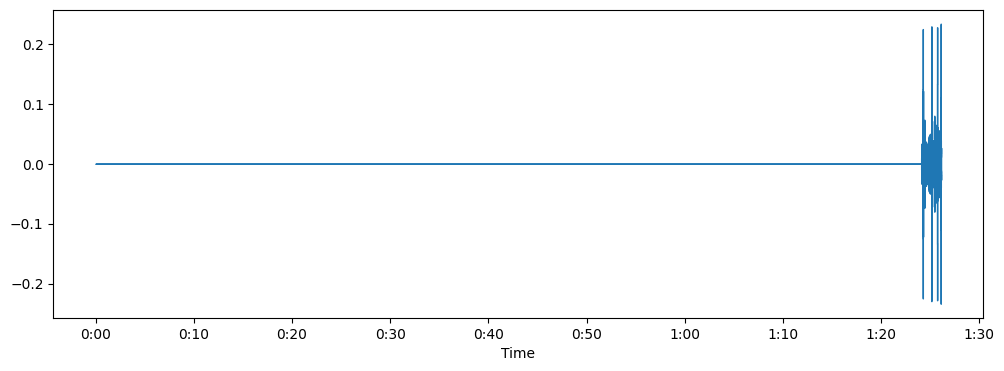

In [ ]:
index = random.choice(train.index)
#  displaying waveplot
print('Class:', train['Class'][index])
data, sampling_rate = librosa.load('AAG/'+str(train['id'][index]) + '.wav', sr = None)

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)





In [ ]:
x= librosa.stft (music_array1)
Xdb =librosa.amplitude_to_db(abs (x))

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow (Xdb, sr=sample_rate1, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
def get_audio_feature_plots(path):
    x , sr = librosa.load(path)
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot')
    librosa.display.waveshow(x, sr=sr)
    plt.show()

    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title('Zero Crossing Rate ')
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()

    y= librosa.stft (x)
    Xdb =librosa.amplitude_to_db(abs (y))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow (Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
index = random.choice(train.index)
print('Class:', train['class'][index])
path = 'colab/'+str(train['id'][index]) + '.wav'
get_audio_feature_plots(path)
ipd.Audio(path)

**Feature Extraction**

In [ ]:
#If you decided to zooming in
'''n0= 167900
n1 =167998
plt.figure(figsize=(14, 5))
plt.plot(music_array1[n0:n1])
plt.grid()'''

Zero-crossing

In [ ]:
def get_zero_crossings_count (file_name):
  temp_wave_x , temp_sample_rate= librosa.load(file_name)
  zero_crossings_count= librosa.zero_crossings (temp_wave_x, pad=False)
  return sum(zero_crossings_count)

In [ ]:
index = random.choice(train.index)
print('Class:', train['class'][index])
path = 'colab/'+str(train['id'][index]) + '.wav'
print(get_zero_crossings_count(path))

Spectral Centroids


In [ ]:
x , srate = librosa.load(path)
all_centroids = librosa.feature.spectral_centroid(y=x, sr=srate)
all_centroids.shape

In [ ]:
spectral_centroids =librosa.feature.spectral_centroid(y=x, sr=srate)[0]
spectral_centroids.shape

In [ ]:
frames=range(len(spectral_centroids))
frames

In [ ]:
t=librosa.frames_to_time(frames)
t.shape

In [ ]:
#Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
  return minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow (x, sr=srate, alpha=0.4)
plt.plot(t, normalize (spectral_centroids), color='r')

Spectral rolloff

In [ ]:
spectral_rolloff= librosa.feature.spectral_rolloff (y=x+0.01, sr=srate)[0]
spectral_rolloff.shape

In [ ]:
#Computing the time variable for visualization
frames=range(len(spectral_rolloff))
t =librosa.frames_to_time (frames)
t.shape
#Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
  return minmax_scale (x, axis=axis)
librosa.display.waveshow (x, sr=srate, alpha=0.4)
plt.plot(t, normalize (spectral_rolloff), color='r')

MFCC

In [ ]:
mfccs=librosa.feature.mfcc(y=x, sr=srate)
print (mfccs.shape)

(Above 20 MFCC features)

In [ ]:
librosa.display.specshow (mfccs, sr=srate, x_axis='time')

In [ ]:
import sklearn
mfccs=sklearn.preprocessing.scale(mfccs, axis=1)
print (mfccs.mean (axis=1))
print (mfccs.var (axis=1))
librosa.display.specshow (mfccs, sr=srate, x_axis='time')
def count_mfcc (source_file_name):
  temp_wave_x, temp_sample_rate =librosa.load(source_file_name)
  mfccs= librosa.feature.mfcc (y=temp_wave_x, sr=temp_sample_rate)
  print("Total MFCC features" + str(mfccs.shape[0])+" for the total "+ str(mfccs.shape[1]) + "frames.")

**PCA on KNN imputations**

1.for zero crossing rate


In [ ]:
def scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    data = pd.DataFrame(data)
    return data
def Principal_Component(data):
    pca = PCA()
    X_pca = pca.fit_transform(data)
    X_pca= np.resize(data, (9, 1000))
    X_pca = pd.DataFrame(X_pca, columns=['PCA_'+str(i) for i in range(1000)])
    return X_pca,pca

In [ ]:
## Scaling KNN imputed features
KNN_impute_scale1 = scaling(KNN_impute1)
KNN_impute_scale2 = scaling(KNN_impute2)
KNN_impute_scale3 = scaling(KNN_impute3)
KNN_impute_scale4 = scaling(KNN_impute4)
KNN_impute_scale5 = scaling(KNN_impute5)

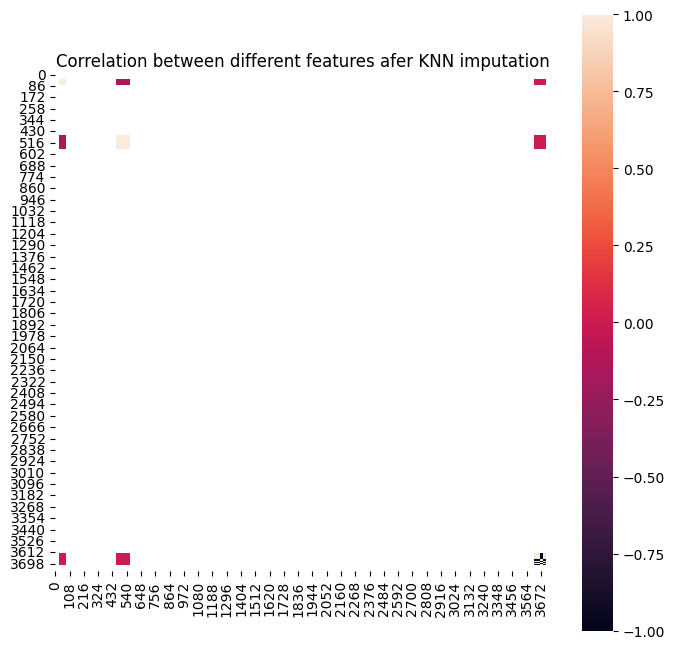

In [ ]:
## plotting Correlation between KNN imputed features
plt.figure(figsize=(8,8))
sns.heatmap(KNN_impute_scale1.corr(), vmax=1, square=True)
plt.title('Correlation between different features afer KNN imputation')
plt.show()

In [ ]:
## Applying PCA on KNN imputed features
KNN_impute_pca1,pca1 = Principal_Component(KNN_impute_scale1)
KNN_impute_pca2,pca2 = Principal_Component(KNN_impute_scale2)
KNN_impute_pca3,pca3 = Principal_Component(KNN_impute_scale3)
KNN_impute_pca4,pca4 = Principal_Component(KNN_impute_scale4)
KNN_impute_pca5,pca5 = Principal_Component(KNN_impute_scale5)

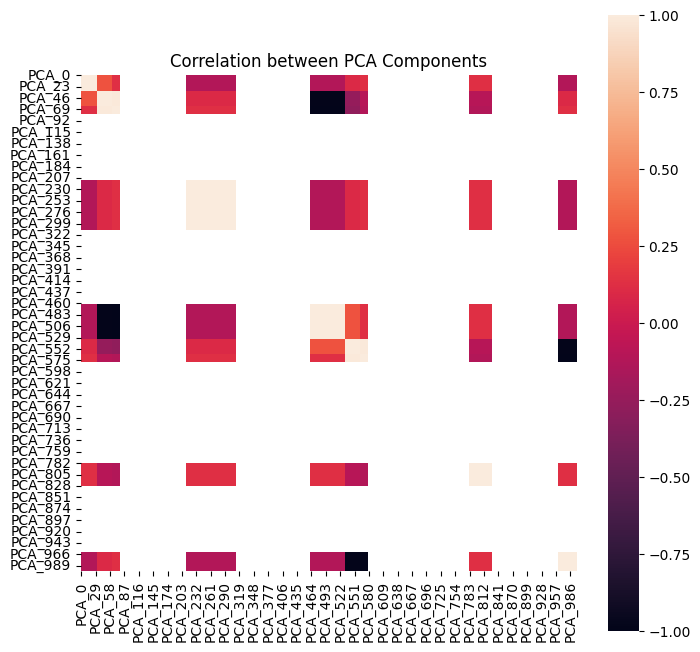

In [ ]:
## plotting Correlation between KNN imputed features after applying PCA
plt.figure(figsize=(8,8))
sns.heatmap(KNN_impute_pca1.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()

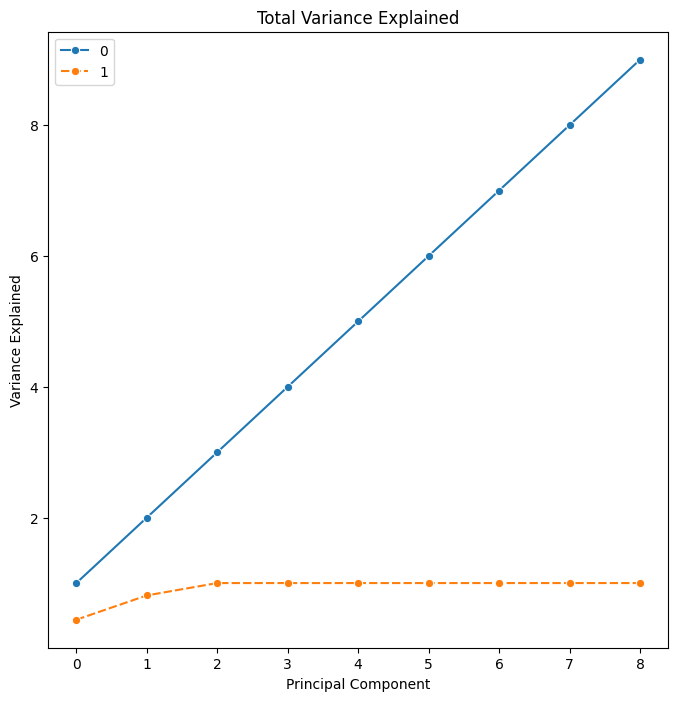

In [ ]:
plt.figure(figsize=(8,8))
sns.lineplot(data=(np.arange(pca1.n_components_) + 1,
             np.cumsum(pca1.explained_variance_ratio_)),
             marker='o')
plt.title('Total Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

2.**chroma** **frequencies**

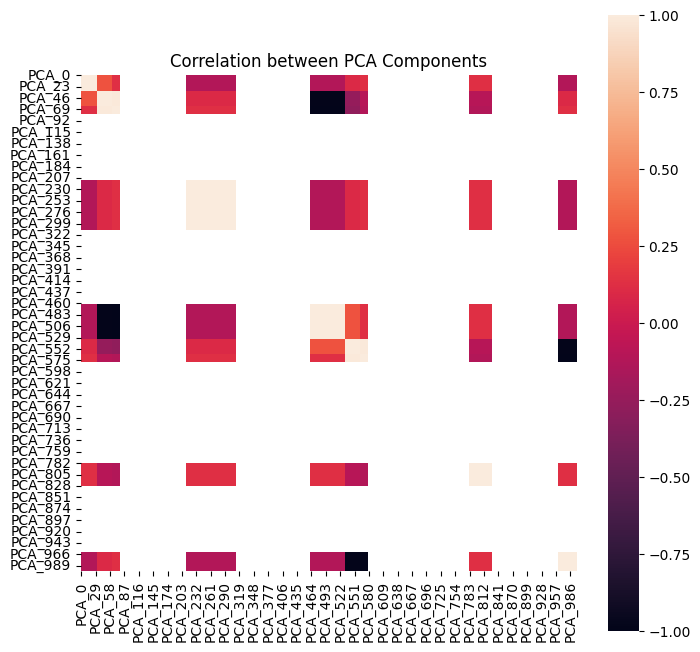

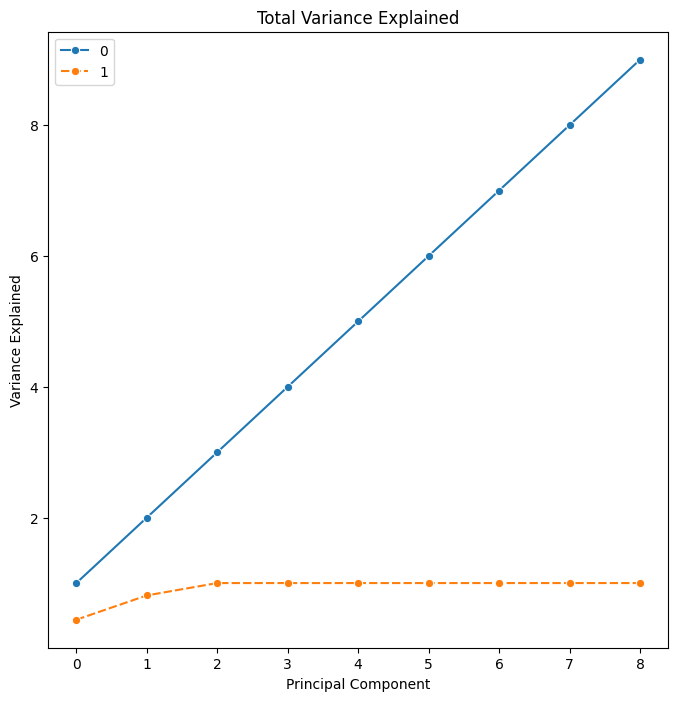

In [ ]:
## plotting Correlation between KNN imputed features after applying PCA
plt.figure(figsize=(8,8))
sns.heatmap(KNN_impute_pca2.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()


plt.figure(figsize=(8,8))
sns.lineplot(data=(np.arange(pca2.n_components_) + 1,
             np.cumsum(pca2.explained_variance_ratio_)),
             marker='o')
plt.title('Total Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**3.RMS value**

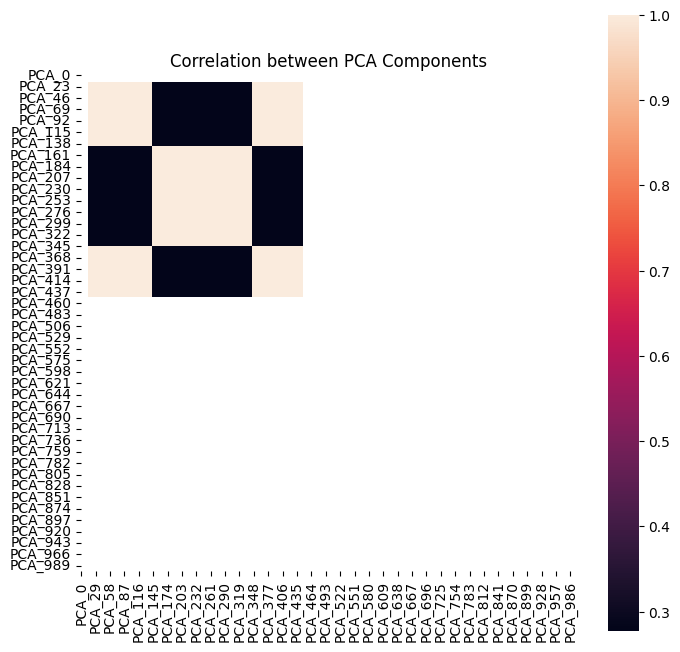

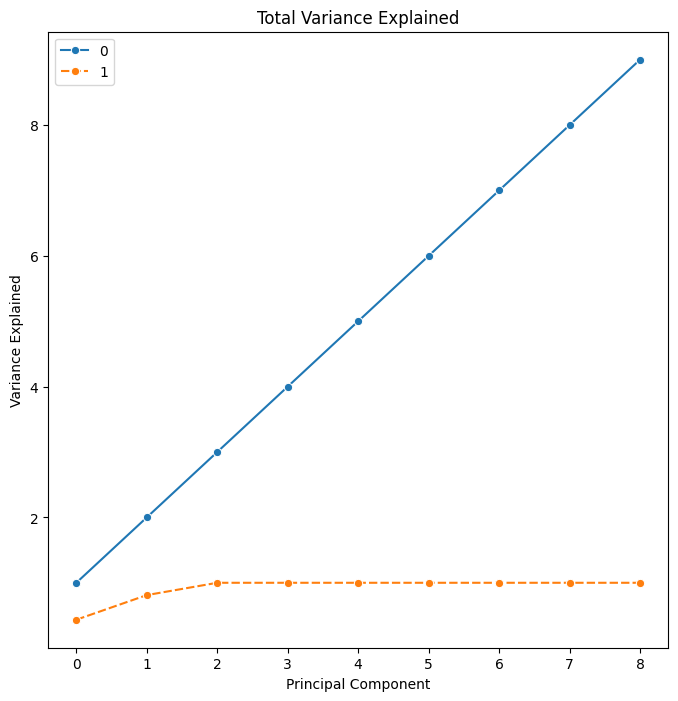

In [ ]:
## plotting Correlation between KNN imputed features after applying PCA
plt.figure(figsize=(8,8))
sns.heatmap(KNN_impute_pca3.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()


plt.figure(figsize=(8,8))
sns.lineplot(data=(np.arange(pca3.n_components_) + 1,
             np.cumsum(pca3.explained_variance_ratio_)),
             marker='o')
plt.title('Total Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

4.**spectral** **centroid**

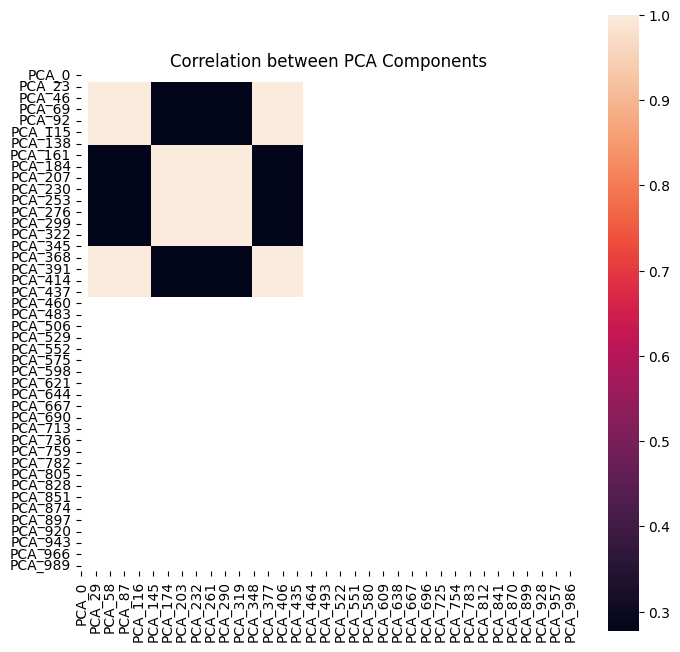

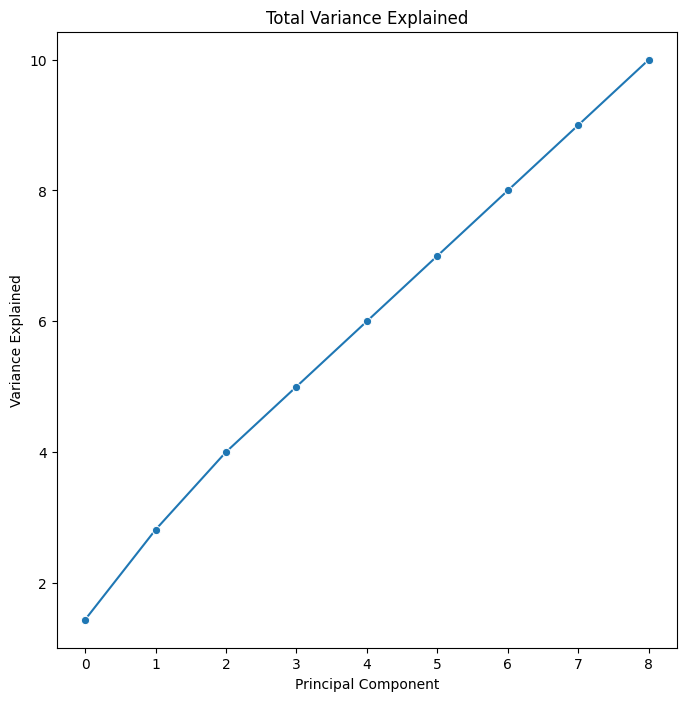

In [ ]:
## plotting Correlation between KNN imputed features after applying PCA
plt.figure(figsize=(8,8))
sns.heatmap(KNN_impute_pca4.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()


plt.figure(figsize=(8,8))
sns.lineplot(data=(np.arange(pca4.n_components_) + 1 +
             np.cumsum(pca4.explained_variance_ratio_)),
             marker='o')
plt.title('Total Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**5.spectral rolloff**

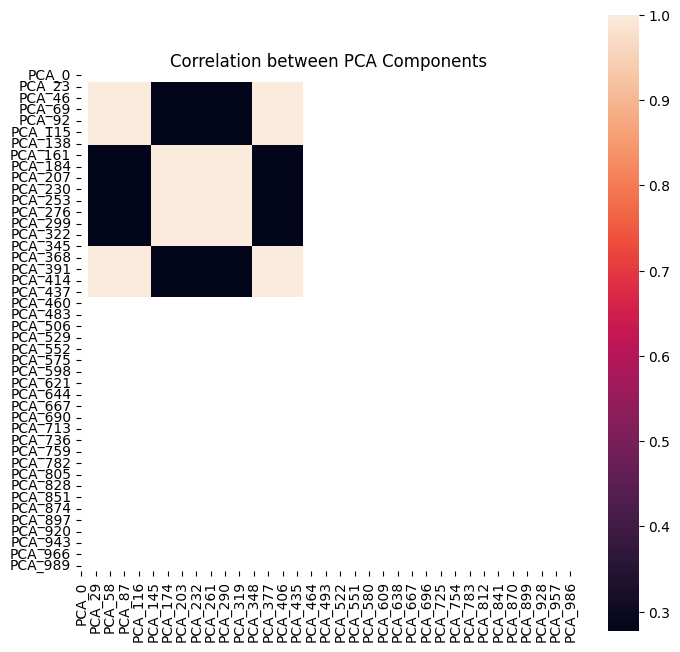

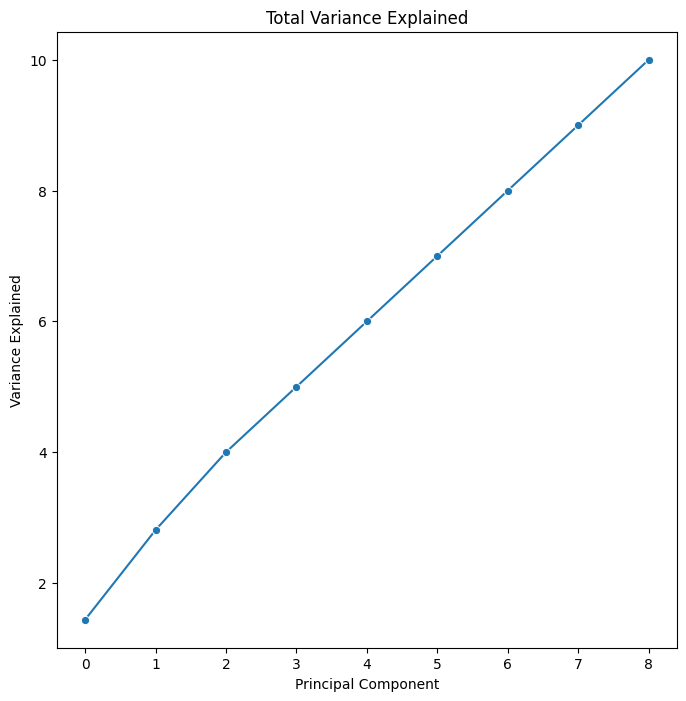

In [ ]:
## plotting Correlation between KNN imputed features after applying PCA
plt.figure(figsize=(8,8))
sns.heatmap(KNN_impute_pca5.corr(), vmax=1, square=True)

plt.title('Correlation between PCA Components')
plt.show()


plt.figure(figsize=(8,8))
sns.lineplot(np.arange(pca5.n_components_) + 1 +
             np.cumsum(pca5.explained_variance_ratio_),
             marker='o')
plt.title('Total Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

**DBScan**

In [ ]:
## For storing results of each algorithm
results_KNN = pd.DataFrame({'PCA0': KNN_impute_pca1['PCA_0'],
                        'PCA1':KNN_impute_pca2['PCA_1'],
                        'PCA2':KNN_impute_pca3['PCA_2']})

In [ ]:
X=results_KNN.to_numpy()
model=DBSCAN().fit(X)
train['cluster']=model.labels_
train

,id,Class,cluster
0,1,foghorn,0
1,2,foghorn,0
2,3,foghorn,0
3,4,ship,0
4,5,ship,0
5,6,ship,0
6,7,honking,0
7,8,honking,0
8,9,honking,0


In [ ]:
import plotly.express as px
fig=px.scatter(x=train.id,y=train.Class, color=train['cluster'])
fig.show()

In [ ]:
##X= KNN_impute_pca1.iloc[:, :3]
DBScan = DBSCAN(eps = 3.25)
y_DBscan = DBScan.fit_predict(X)
results_KNN["DBscan"] = y_DBscan
Sil_Score_DBscan = silhouette_score(X,y_DBscan)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)